<a href="https://colab.research.google.com/github/Lakshmiluck2/FMMLAB-PROJECTS/blob/main/Another_copy_of_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab by Ganesh Chandan

kanakala.ganesh@research.iiit.ac.in

## Anomaly/Outlier Detection

Anomalies can sometimes lead to some discoveries. For example an anomalous bank withdrawal (with say multiple PIN attempts) can be an indicator of a fraudulent transaction. Or anomalous memory usage in a server station can indicate a bug.

These kinds of anomalies ned to be spotted quickly to avoid damage. Noise and anomalies are however, not the same.

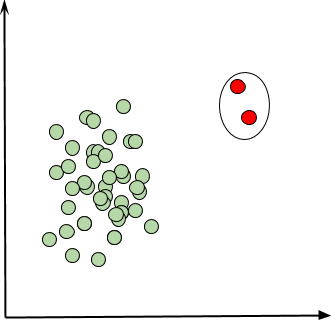

In the above data, the red dots seem to be outliers.

** *italicised text*Excercise 1 (Histogram based Anomaly Detection)**

Is a simple classification algorithm suitable for anomaly detection? (Hint - Is accuracy the correct metric?)

The confusion matrix looks like this

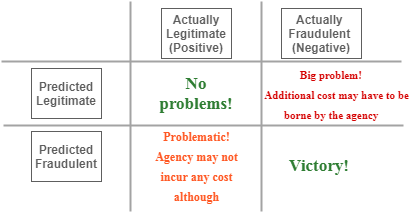

In [ ]:
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 13.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from faker import Faker
Faker.seed(4321)
fake = Faker()

names_list = []

fake = Faker()
for _ in range(100):
  names_list.append(fake.name())
np.random.seed(7)

salaries = []
for _ in range(100):
    salary = np.random.randint(1000,2500)
    salaries.append(salary)

salary_df = pd.DataFrame(
    {'Person': names_list,
     'Salary (in USD)': salaries
    })

print(salary_df.head())

              Person  Salary (in USD)
0        Jason Brown             1175
1        Jacob Stein             2220
2         Cody Brown             1537
3      Larry Morales             1502
4  Jessica Hendricks             1211


In [ ]:
salary_df.at[16, 'Salary (in USD)'] = 23
salary_df.at[65, 'Salary (in USD)'] = 17
print(salary_df.loc[16])
print(salary_df.loc[65])

Person             Miss Amanda Harris MD
Salary (in USD)                       23
Name: 16, dtype: object
Person             Joyce Bishop
Salary (in USD)              17
Name: 65, dtype: object


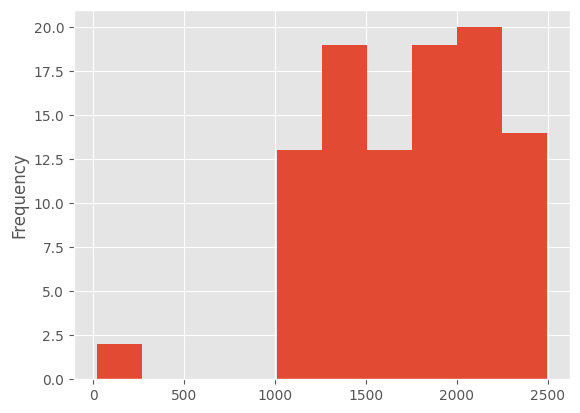

In [ ]:

salary_df['Salary (in USD)'].plot(kind='hist')
plt.show()

We can visually see the anomalies!

### Exercise 2

What is a mathematical way for anomaly detection? (Hint - Model data to be Gaussian distribution / Does the Reverse Nearest Neighbour reveal something about the anomalies?)

In [ ]:
pip install numpy pandas matplotlib seaborn scipy scikit-learn


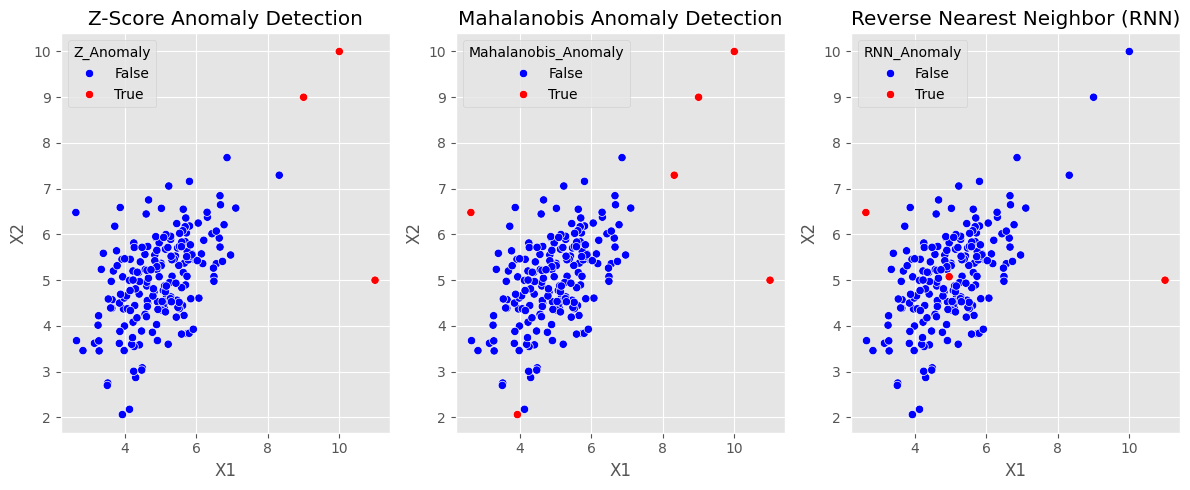

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy.spatial.distance import mahalanobis
from sklearn.neighbors import NearestNeighbors

np.random.seed(42)
mean = [5, 5]
cov = [[1, 0.5], [0.5, 1]]
data = np.random.multivariate_normal(mean, cov, 200)

anomalies = np.array([[9, 9], [10, 10], [11, 5]])
data = np.vstack((data, anomalies))

df = pd.DataFrame(data, columns=['X1', 'X2'])

df['Z_Score_X1'] = zscore(df['X1'])
df['Z_Score_X2'] = zscore(df['X2'])
df['Z_Anomaly'] = ((df['Z_Score_X1'].abs() > 3) | (df['Z_Score_X2'].abs() > 3))

cov_matrix = np.cov(df[['X1', 'X2']].T)
inv_cov_matrix = np.linalg.inv(cov_matrix)
mean_vector = df[['X1', 'X2']].mean().values

df['Mahalanobis_Dist'] = df.apply(lambda row: mahalanobis(row[['X1', 'X2']], mean_vector, inv_cov_matrix), axis=1)
threshold = np.percentile(df['Mahalanobis_Dist'], 97.5)
df['Mahalanobis_Anomaly'] = df['Mahalanobis_Dist'] > threshold

knn = NearestNeighbors(n_neighbors=5)
knn.fit(df[['X1', 'X2']])
distances, indices = knn.kneighbors(df[['X1', 'X2']])
reverse_nn_counts = np.zeros(len(df))

for neighbors in indices:
    for neighbor in neighbors:
        reverse_nn_counts[neighbor] += 1

df['RNN_Count'] = reverse_nn_counts
df['RNN_Anomaly'] = df['RNN_Count'] < 2

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='X1', y='X2', data=df, hue='Z_Anomaly', palette={True: 'red', False: 'blue'})
plt.title('Z-Score Anomaly Detection')

plt.subplot(1, 3, 2)
sns.scatterplot(x='X1', y='X2', data=df, hue='Mahalanobis_Anomaly', palette={True: 'red', False: 'blue'})
plt.title('Mahalanobis Anomaly Detection')

plt.subplot(1, 3, 3)
sns.scatterplot(x='X1', y='X2', data=df, hue='RNN_Anomaly', palette={True: 'red', False: 'blue'})
plt.title('Reverse Nearest Neighbor (RNN)')

plt.tight_layout()
plt.show()


### Clustering based approach for anomaly detection

We have seen how clustering and anomaly detection are closely related but they serve different purposes. But clustering can be used for anomaly detection. In this approach, we start by grouping the similar kind of objects.

In [ ]:

salary_raw = salary_df['Salary (in USD)'].values
salary_raw = salary_raw.reshape(-1, 1)
salary_raw = salary_raw.astype('float64')

In [ ]:

from scipy.cluster.vq import kmeans
centroids, avg_distance = kmeans(salary_raw, 4)

In [ ]:

from scipy.cluster.vq import vq

groups, cdist = vq(salary_raw, centroids)

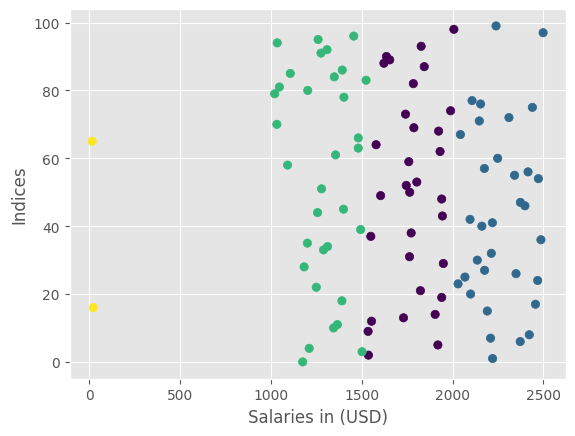

In [ ]:
plt.scatter(salary_raw, np.arange(0,100), c=groups)
plt.xlabel('Salaries in (USD)')
plt.ylabel('Indices')
plt.show()

The above method for anomaly detection is purely unsupervised in nature. If we had the class-labels of the data points, we could have easily converted this to a supervised learning problem, specifically a classification problem.

If we were also given the labels, we could perform a modified version of classification, which is a supervised learning process.

## KMeans for Image Compression

As you know an image is made of mutiple pixels each of which have their color values (RGB). But what if we clustered pixels with similar color values together and replaced all pixels in a cluster by their closest color? This would highly reduce the space required to store the image.

In [ ]:

import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
image_location = 'https://user-images.githubusercontent.com/42711978/87903363-71f5a900-ca79-11ea-9317-3c7dc7eccc27.jpg'


Image shape = (1200, 1600, 3)


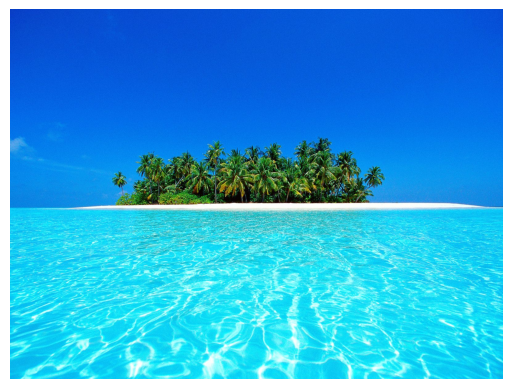

Total Pixels = 1920000
Data Sample: 


array([[  3,  57, 192],
       [  9,  63, 198],
       [ 12,  66, 201]], dtype=uint8)

In [ ]:
image = io.imread(image_location)
print("Image shape = " + str(image.shape))
plt.imshow(image)
plt.axis(False)
plt.show()
all_pixels = image.reshape((-1,3))
print("Total Pixels = " + str(len(all_pixels)))
print("Data Sample: ")
all_pixels[:3]

CLUSTER-LEVEL DOMINANT COLOURS (K = 3)


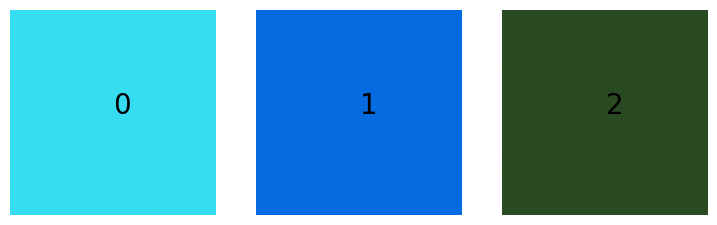

In [ ]:

k=3
kmeans = KMeans(n_clusters=k)
kmeans.fit(all_pixels)
kmeans_centroids = np.array(kmeans.cluster_centers_, dtype="uint")

fig, axs = plt.subplots(1, k)
fig.set_size_inches(3 * k, 3, forward=True)
for clusternumber in range(0,len(kmeans_centroids)):
  centroid = np.zeros((100,100,3))
  centroid[:,:,:] = kmeans_centroids[clusternumber]
  axs[clusternumber].imshow(centroid/255)
  axs[clusternumber].text(50,50,str(clusternumber),fontsize=20)
  axs[clusternumber].axis("off")

print("CLUSTER-LEVEL DOMINANT COLOURS (K = " + str(k) + ")")
plt.show()

In [ ]:

image_compressed = np.zeros((all_pixels.shape[0], 3), dtype="uint")
for ix in range(all_pixels.shape[0]):
    image_compressed[ix] = kmeans_centroids[kmeans.labels_[ix]]
image_compressed = image_compressed.reshape(image.shape)

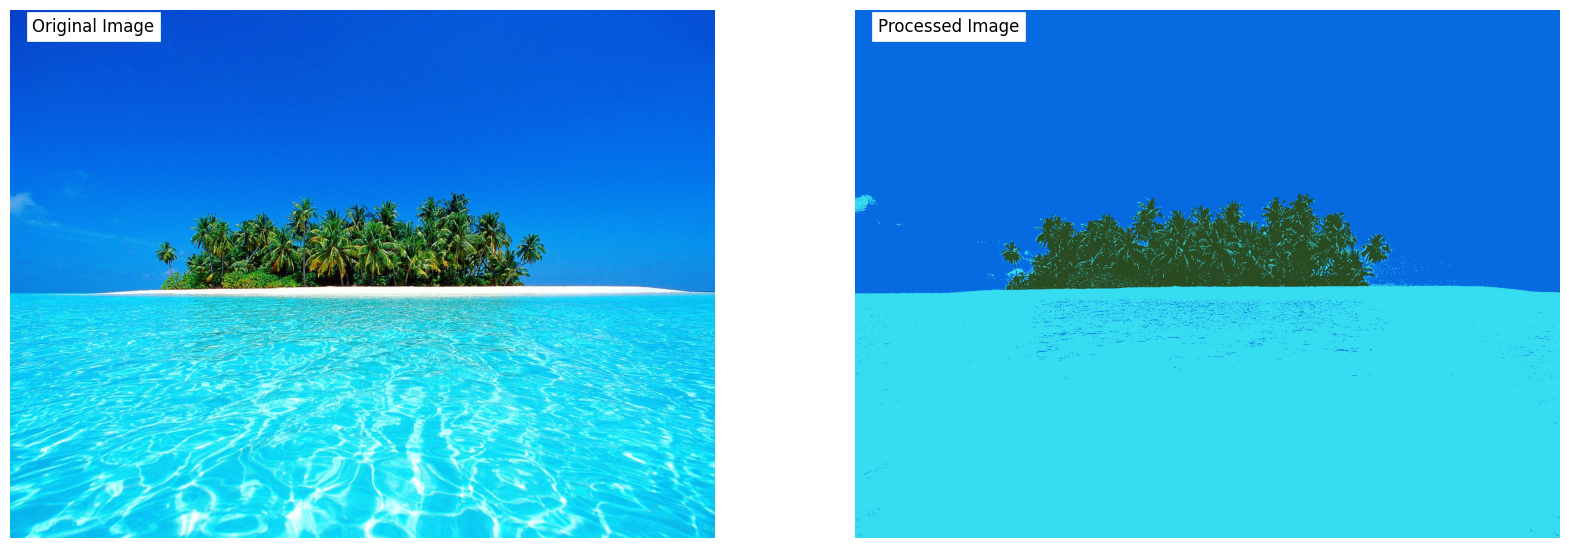

In [ ]:

fig, axs = plt.subplots(1, 2)
fig.set_size_inches(20, 10, forward=True)

axs[0].imshow(image)
axs[0].text(50,50,"Original Image", fontsize=12, c = 'black', backgroundcolor = 'white')
axs[0].axis(False)

axs[1].imshow(image_compressed)
axs[1].text(50,50,"Processed Image", fontsize=12, c = 'black', backgroundcolor = 'white')
axs[1].axis(False)

plt.show()

Now, we compare the effect of varying K.

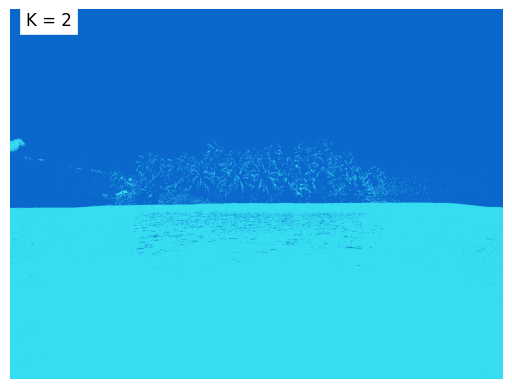

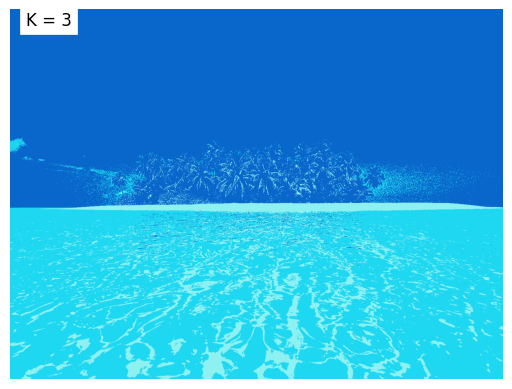

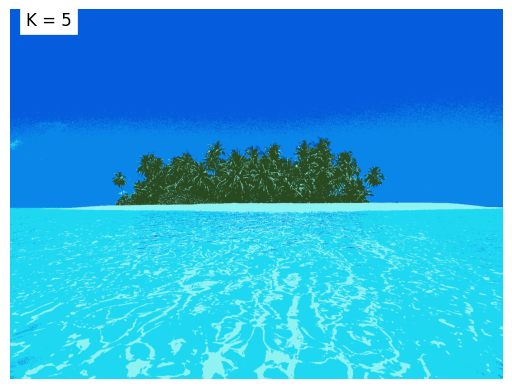

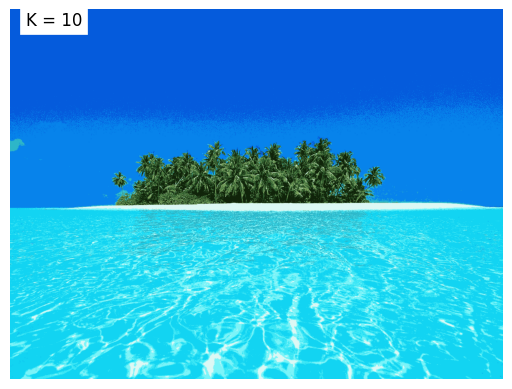

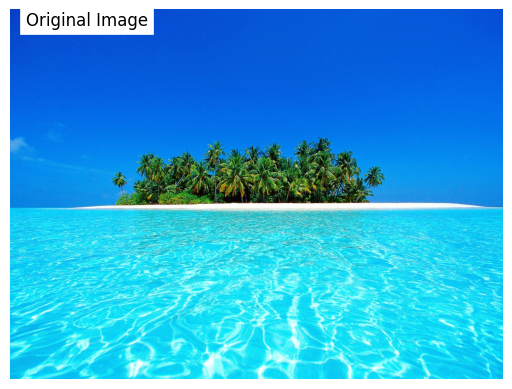

In [ ]:
K = [2, 3, 5, 10]
for k in K:


  kmeans = KMeans(n_clusters=k)
  kmeans.fit(all_pixels)
  kmeans_centroids = np.array(kmeans.cluster_centers_, dtype="uint")

  image_compressed = np.zeros((all_pixels.shape[0], 3), dtype="uint")
  for ix in range(all_pixels.shape[0]):
      image_compressed[ix] = kmeans_centroids[kmeans.labels_[ix]]
  image_compressed = image_compressed.reshape(image.shape)

  plt.imshow(image_compressed)
  plt.text(50,50,"K = " + str(k), fontsize=12, c = 'black', backgroundcolor = 'white')
  plt.axis(False)
  plt.show()

plt.imshow(image)
plt.text(50,50,"Original Image", fontsize=12, c = 'black', backgroundcolor = 'white')
plt.axis(False)
plt.show()

You can replace the image above with your own and see how it looks!

## Resouces and References

1. https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/
2. https://blog.floydhub.com/introduction-to-anomaly-detection-in-python/
3. https://www.kaggle.com/aryan27/k-means-clustering

### Exercise

* Upload your own image and play with different K values
* Figure out how do we evaluate emage compressions and implement any one of them

In [ ]:
pip install numpy matplotlib opencv-python scikit-learn


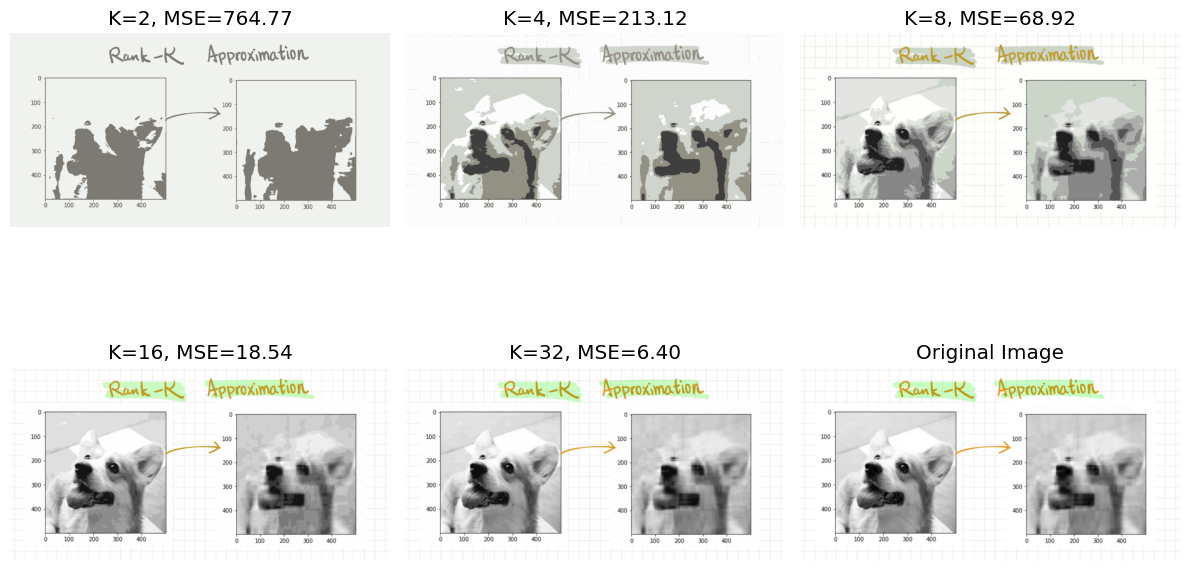

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error

def compress_image(image, k):
    h, w, c = image.shape
    pixels = image.reshape(-1, 3)

    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pixels)

    compressed_pixels = kmeans.cluster_centers_[kmeans.labels_]
    compressed_image = compressed_pixels.reshape(h, w, c).astype(np.uint8)

    return compressed_image, kmeans.cluster_centers_

def mse(original, compressed):
    return mean_squared_error(original.reshape(-1, 3), compressed.reshape(-1, 3))

file_path = "/content/fmml pic.webp"
image = cv2.imread(file_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

k_values = [2, 4, 8, 16, 32]
plt.figure(figsize=(12, 8))

for i, k in enumerate(k_values):
    compressed_image, _ = compress_image(image, k)
    error = mse(image, compressed_image)

    plt.subplot(2, 3, i+1)
    plt.imshow(compressed_image)
    plt.title(f"K={k}, MSE={error:.2f}")
    plt.axis("off")

plt.subplot(2, 3, len(k_values)+1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

plt.tight_layout()
plt.show()
